# Task 2 
## overview: A trial was conducted at store '77' for 3 months starting from feb 2019, the client wants to know if this trial was successful
## Objective: Find a suitable store that can act as the control store and then conduct a hypothesis testing to provide a statistically proven answer.

In [85]:
import statistics as st
import scipy.stats as s
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [86]:
data=pd.read_csv('file11.csv')

**Data Cleaning**

In [87]:
data.head()

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,company,LIFESTAGE,PREMIUM_CUSTOMER
0,0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160,WW,MIDAGE SINGLES/COUPLES,Budget
3,3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,CCs,MIDAGE SINGLES/COUPLES,Budget


In [88]:
data=data.drop('Unnamed: 0',axis=1) 

In [89]:
data_cleaned=data.drop(labels=['company','PROD_NAME','LIFESTAGE'],axis=1) #Drop unwanted columns
#for faster loading times

In [90]:
data_cleaned.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,pack_size,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,2,6.0,175,Premium
1,2019-05-14,1,1307,348,66,3,6.3,175,Budget
2,2018-11-10,1,1307,346,96,2,3.8,160,Budget
3,2019-03-09,1,1307,347,54,1,2.1,175,Budget
4,2019-05-20,1,1343,383,61,2,2.9,170,Budget


In [91]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255510 entries, 0 to 255509
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              255510 non-null  object 
 1   STORE_NBR         255510 non-null  int64  
 2   LYLTY_CARD_NBR    255510 non-null  int64  
 3   TXN_ID            255510 non-null  int64  
 4   PROD_NBR          255510 non-null  int64  
 5   PROD_QTY          255510 non-null  int64  
 6   TOT_SALES         255510 non-null  float64
 7   pack_size         255510 non-null  int64  
 8   PREMIUM_CUSTOMER  255510 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.5+ MB


In [92]:
data_cleaned['STORE_NBR']=data_cleaned['STORE_NBR'].astype('str') 

In [93]:
data_cleaned['DATE']=pd.to_datetime(data_cleaned['DATE'])

In [94]:
data_cleaned['yearmonth']=data_cleaned['DATE'].dt.to_period('M') #Column that will be needed later
data_cleaned.head(5) 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,pack_size,PREMIUM_CUSTOMER,yearmonth
0,2018-10-17,1,1000,1,5,2,6.0,175,Premium,2018-10
1,2019-05-14,1,1307,348,66,3,6.3,175,Budget,2019-05
2,2018-11-10,1,1307,346,96,2,3.8,160,Budget,2018-11
3,2019-03-09,1,1307,347,54,1,2.1,175,Budget,2019-03
4,2019-05-20,1,1343,383,61,2,2.9,170,Budget,2019-05


**Pretrial period is before March**

In [95]:
pretrial_period=data_cleaned[(data_cleaned['yearmonth']< '2019-02' ) ]


In [96]:
pretrial_period['yearmonth'].value_counts().sort_index()

2018-07    21796
2018-08    21567
2018-09    20987
2018-10    21485
2018-11    21080
2018-12    22007
2019-01    21377
Freq: M, Name: yearmonth, dtype: int64

In [97]:
store_open_months=pretrial_period.groupby('STORE_NBR')['yearmonth'].nunique().sort_values(ascending=False)
store_open_months.head()

STORE_NBR
1      7
264    7
250    7
251    7
253    7
Name: yearmonth, dtype: int64

In [98]:
possible_ctrl_stores=store_open_months[store_open_months.values>6].index #stores that were operated during entire pretrial period
possible_ctrl_stores=possible_ctrl_stores.tolist() #List of possible control stores

In [99]:
pretrial_dataset=pretrial_period[pretrial_period['STORE_NBR'].isin(possible_ctrl_stores)]
pretrial_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,pack_size,PREMIUM_CUSTOMER,yearmonth
0,2018-10-17,1,1000,1,5,2,6.0,175,Premium,2018-10
2,2018-11-10,1,1307,346,96,2,3.8,160,Budget,2018-11
5,2018-08-17,2,2373,974,69,5,15.0,175,Budget,2018-08
6,2018-08-18,2,2426,1038,108,3,13.8,150,Budget,2018-08
8,2018-07-06,4,4149,3330,46,2,10.8,175,Budget,2018-07


In [100]:
pretrial_dataset.groupby(by='STORE_NBR')['yearmonth'].nunique().count() 
#Check number of all stores operated during the 7 months

260

In [101]:
pretrial_dataset.groupby(by=['STORE_NBR','yearmonth']).agg({'TOT_SALES':'sum','TXN_ID':'count'}).head(10)

TOT_SALES  TXN_ID
STORE_NBR yearmonth                   
1         2018-07       191.60      50
          2018-08       171.00      42
          2018-09       273.70      61
          2018-10       188.10      45
          2018-11       187.50      46
          2018-12       169.20      44
          2019-01       149.70      35
10        2018-07       861.40     119
          2018-08       863.35     123
          2018-09       894.00     134

In [102]:
pretrial_dataset['STORE_NBR']=pretrial_dataset['STORE_NBR'].astype(str)
pretrial_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150185 entries, 0 to 255509
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              150185 non-null  datetime64[ns]
 1   STORE_NBR         150185 non-null  object        
 2   LYLTY_CARD_NBR    150185 non-null  int64         
 3   TXN_ID            150185 non-null  int64         
 4   PROD_NBR          150185 non-null  int64         
 5   PROD_QTY          150185 non-null  int64         
 6   TOT_SALES         150185 non-null  float64       
 7   pack_size         150185 non-null  int64         
 8   PREMIUM_CUSTOMER  150185 non-null  object        
 9   yearmonth         150185 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(5), object(2), period[M](1)
memory usage: 12.6+ MB


# Testing for the total sales
### Creating the dataset

In [103]:
pretrial_sales_stores_final=pretrial_dataset[['STORE_NBR','TOT_SALES','yearmonth']]
pretrial_sales_stores_final=pretrial_sales_stores_final.groupby(by=['STORE_NBR','yearmonth']).agg({'TOT_SALES':'sum'}).reset_index()
pretrial_sales_stores_final=pretrial_sales_stores_final.pivot(index='yearmonth',values='TOT_SALES',columns='STORE_NBR') #Stores are columns for better comparison between them


In [104]:
pretrial_sales_stores_final #Checking each stores' sales monthly

STORE_NBR,1,10,100,101,102,103,104,105,106,107,...,9,90,91,93,94,95,96,97,98,99
yearmonth,,,,,,,,,,,,,,,,,,,,,
2018-07,191.6,861.40,986.2,866.4,751.8,191.2,796.6,867.7,1012.20,805.4,...,289.7,215.0,807.3,1009.0,909.40,1022.80,357.4,838.00,118.5,18.5
2018-08,171.0,863.35,910.5,820.1,955.8,255.1,861.5,903.3,769.25,807.5,...,327.5,224.5,819.2,967.5,1095.95,1144.85,343.0,902.05,95.0,14.8
2018-09,273.7,894.00,933.6,826.2,929.6,253.9,778.8,826.2,1056.40,721.0,...,359.5,142.0,938.9,1110.8,956.60,1058.00,355.2,847.60,112.0,23.4
2018-10,188.1,849.60,1015.4,851.2,830.8,244.8,895.4,849.4,898.00,796.4,...,350.8,314.3,795.7,1017.6,1018.60,1114.20,266.2,942.20,139.6,14.7
2018-11,187.5,844.20,792.8,835.0,858.6,400.0,736.0,730.6,946.40,726.8,...,364.2,226.2,865.3,903.4,937.90,1073.20,345.2,812.60,101.4,17.2
2018-12,169.2,926.40,1000.2,728.6,806.4,277.0,887.0,997.6,810.20,725.6,...,346.9,247.4,805.6,1176.4,861.00,1048.20,455.2,858.60,159.9,4.2
2019-01,149.7,827.60,1023.4,795.4,887.8,286.1,861.6,786.6,859.40,837.2,...,373.9,305.8,774.7,927.6,932.40,1015.10,374.0,824.20,108.5,15.7


In [105]:
def corr (trial_store,ctrl_stores):
    """" A function for getting correlation between trial store and possible control stores"""
    ctrl_stores_corr=pd.Series()
    for i in ctrl_stores:
        store=pretrial_sales_stores_final[i]
        corr=trial_store.corr(store)
        ctrl_stores_corr[i]=corr
    return (ctrl_stores_corr)

In [106]:
from sklearn.metrics import mean_absolute_error as mae
def mean_ae (trial_store,ctrl_stores):
    """" A function for getting mean absolute error between trial store and possible control stores"""
    x=[]
    ctrl_stores_mae=pd.Series()
    for i in ctrl_stores:
        store=pretrial_sales_stores_final[i]
        error=mae(trial_store,store)
        ctrl_stores_mae[i]=error
    return (ctrl_stores_mae)

In [107]:
correlated_stores=corr(pretrial_sales_stores_final['77'],pretrial_sales_stores_final.columns)
mae_stores=mean_ae(pretrial_sales_stores_final['77'],pretrial_sales_stores_final.columns)


In [108]:
possible_ctrl_stores=pd.DataFrame({'mas':mae_stores,'corr':correlated_stores})
possible_ctrl_stores.sort_values(by='mas').head(10)

,mas,corr
77,0.000000,1.000000
233,19.757143,0.974107
188,24.214286,0.462139
205,30.957143,0.194238
50,31.071429,0.890306
255,31.485714,-0.149142
131,31.585714,0.267529
214,33.714286,0.266908
53,33.928571,0.607399
46,34.642857,0.216715


In [109]:
possible_ctrl_stores.sort_values(by='corr',ascending=False).head(10)

,mas,corr
77,0.000000,1.000000
233,19.757143,0.974107
41,49.714286,0.900107
50,31.071429,0.890306
119,665.885714,0.840297
71,693.728571,0.826861
162,570.357143,0.823976
17,133.028571,0.749214
115,83.285714,0.740194
30,610.171429,0.704060


## By checking both ordering we can easily conclude that store '233' is ideal to be a control store

In [110]:
#calulating average total sales for other stores 
means=[]
otherstores=pretrial_sales_stores_final.drop(columns=['77','233'],axis=1)
for index,row in otherstores.iterrows():
    means.append(np.mean(row))
otherstores['avg_total_sales']=means
otherstores

STORE_NBR,1,10,100,101,102,103,104,105,106,107,...,90,91,93,94,95,96,97,98,99,avg_total_sales
yearmonth,,,,,,,,,,,,,,,,,,,,,
2018-07,191.6,861.40,986.2,866.4,751.8,191.2,796.6,867.7,1012.20,805.4,...,215.0,807.3,1009.0,909.40,1022.80,357.4,838.00,118.5,18.5,609.084884
2018-08,171.0,863.35,910.5,820.1,955.8,255.1,861.5,903.3,769.25,807.5,...,224.5,819.2,967.5,1095.95,1144.85,343.0,902.05,95.0,14.8,579.959496
2018-09,273.7,894.00,933.6,826.2,929.6,253.9,778.8,826.2,1056.40,721.0,...,142.0,938.9,1110.8,956.60,1058.00,355.2,847.60,112.0,23.4,591.278682
2018-10,188.1,849.60,1015.4,851.2,830.8,244.8,895.4,849.4,898.00,796.4,...,314.3,795.7,1017.6,1018.60,1114.20,266.2,942.20,139.6,14.7,604.853101
2018-11,187.5,844.20,792.8,835.0,858.6,400.0,736.0,730.6,946.40,726.8,...,226.2,865.3,903.4,937.90,1073.20,345.2,812.60,101.4,17.2,589.766667
2018-12,169.2,926.40,1000.2,728.6,806.4,277.0,887.0,997.6,810.20,725.6,...,247.4,805.6,1176.4,861.00,1048.20,455.2,858.60,159.9,4.2,617.043411
2019-01,149.7,827.60,1023.4,795.4,887.8,286.1,861.6,786.6,859.40,837.2,...,305.8,774.7,927.6,932.40,1015.10,374.0,824.20,108.5,15.7,598.736822


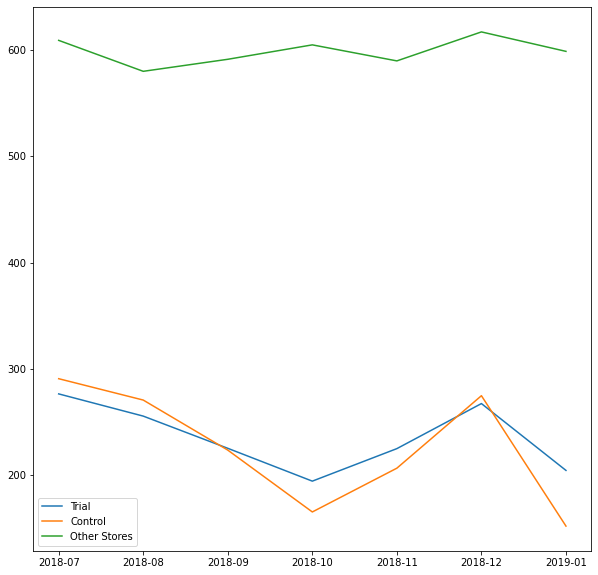

In [111]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
x=pretrial_sales_stores_final.index.astype('str')
y1=pretrial_sales_stores_final['77']
y2=pretrial_sales_stores_final['233']
y3=otherstores['avg_total_sales']
ax.plot(x,y1,label='Trial')
#ax2 = ax.twinx()
ax.plot(x,y2,label='Control')
ax.plot(x,y3,label='Other Stores')
ax.legend()

In [112]:
#preparing final dataset for hypothesis testing
data_hypo=data_cleaned[['TOT_SALES','STORE_NBR','yearmonth']]
data_hypo=data_hypo.groupby(['STORE_NBR','yearmonth'])['TOT_SALES'].sum().reset_index() 

In [113]:
data_hypo=data_hypo[data_hypo['STORE_NBR'].isin(['77','233'])] #trial & control stores only
data_hypo.head()

,STORE_NBR,yearmonth,TOT_SALES
1747,233,2018-07,290.7
1748,233,2018-08,270.6
1749,233,2018-09,223.5
1750,233,2018-10,165.3
1751,233,2018-11,206.5


In [114]:
data_hypo=data_hypo.pivot(index='yearmonth',columns='STORE_NBR',values='TOT_SALES')
data_hypo.head()

STORE_NBR,233,77
yearmonth,,
2018-07,290.7,276.4
2018-08,270.6,255.5
2018-09,223.5,225.2
2018-10,165.3,194.3
2018-11,206.5,224.9


In [115]:
#Scaling control store sales in the pretrial period to match trial store sales to ensure the trial period's
#percentage difference between both stores is accurate
data_hypo_scaling=data_hypo.reset_index()
scaling_factor_period=data_hypo_scaling[data_hypo_scaling['yearmonth']<'2019-02']
scaling_factor=sum(scaling_factor_period['77'].values)/sum(scaling_factor_period['233'].values)
scaling_factor



1.0408640181898567

**Our hypothesis testing would be a t test where:
null hypthosesis states that there's no percentage difference between trial and control stores sales percentage difference in pretrial and trial period
alternative hypothesis states that there's a difference between trial and control stores sales percentage difference in pretrial and trial period**

In [116]:
data_hypo['scaled_233']=data_hypo['233']*scaling_factor
data_hypo['per_diff_scaled']=abs((data_hypo['scaled_233']-data_hypo['77'])/data_hypo['scaled_233'])
data_hypo

STORE_NBR,233,77,scaled_233,per_diff_scaled
yearmonth,,,,
2018-07,290.7,276.4,302.579170,0.086520
2018-08,270.6,255.5,281.657803,0.092871
2018-09,223.5,225.2,232.633108,0.031952
2018-10,165.3,194.3,172.054822,0.129291
2018-11,206.5,224.9,214.938420,0.046346
2018-12,274.7,267.3,285.925346,0.065141
2019-01,152.0,204.4,158.211331,0.291943
2019-02,228.7,224.8,238.045601,0.055643
2019-03,194.0,258.1,201.927620,0.278181


In [117]:
# standard deviation is calculated based on pretrial period since null hypothesis states that there's 
#no difference between pretrial and trial period
std=st.stdev(data_hypo[:7]['per_diff_scaled'])
std
np.std(data_hypo['233'][:7])

50.841052831950925

In [118]:
data_hypo['t_statistic']=data_hypo['per_diff_scaled']/std
data_hypo

STORE_NBR,233,77,scaled_233,per_diff_scaled,t_statistic
yearmonth,,,,,
2018-07,290.7,276.4,302.579170,0.086520,0.984076
2018-08,270.6,255.5,281.657803,0.092871,1.056310
2018-09,223.5,225.2,232.633108,0.031952,0.363422
2018-10,165.3,194.3,172.054822,0.129291,1.470554
2018-11,206.5,224.9,214.938420,0.046346,0.527140
2018-12,274.7,267.3,285.925346,0.065141,0.740907
2019-01,152.0,204.4,158.211331,0.291943,3.320549
2019-02,228.7,224.8,238.045601,0.055643,0.632883
2019-03,194.0,258.1,201.927620,0.278181,3.164019


In [119]:
#degree of freedom = 7(number of pretrial months)-1 = 6
print('t_critical_values based on 95% confidence: {0}'.format(s.t.ppf(q=0.95,df=6)))

t_critical_values based on 95% confidence: 1.9431802803927816


## Since t_statistic for march and april 2019 is > t_critical,therefore we can conclude that the trial was successeful for those two month and there was a statistically significant increase in sales but not for february 2019 which has a t_statistic value less than the critical value

### We can finally say that we can reject the null hypothesis for 2 of 3 month in the trial period


**Visually checking**

In [120]:
moe=(1.94*np.std(data_hypo['233']))/np.sqrt(12) #margin of error
data_hypo['5%']=data_hypo['233']-moe
data_hypo['95%']=data_hypo['233']+moe
data_hypo

STORE_NBR,233,77,scaled_233,per_diff_scaled,t_statistic,5%,95%
yearmonth,,,,,,,
2018-07,290.7,276.4,302.579170,0.086520,0.984076,260.857608,320.542392
2018-08,270.6,255.5,281.657803,0.092871,1.056310,240.757608,300.442392
2018-09,223.5,225.2,232.633108,0.031952,0.363422,193.657608,253.342392
2018-10,165.3,194.3,172.054822,0.129291,1.470554,135.457608,195.142392
2018-11,206.5,224.9,214.938420,0.046346,0.527140,176.657608,236.342392
2018-12,274.7,267.3,285.925346,0.065141,0.740907,244.857608,304.542392
2019-01,152.0,204.4,158.211331,0.291943,3.320549,122.157608,181.842392
2019-02,228.7,224.8,238.045601,0.055643,0.632883,198.857608,258.542392
2019-03,194.0,258.1,201.927620,0.278181,3.164019,164.157608,223.842392


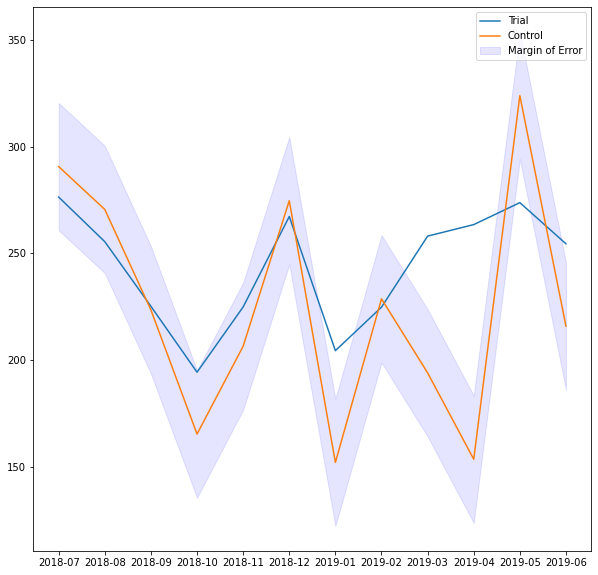

In [121]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
x=data_hypo.index.astype('str')
y1=data_hypo['77']
y2=data_hypo['233']
ax.plot(x,y1,label='Trial')
ax.plot(x,y2,label='Control')
ax.fill_between(x, (y2-moe), (y2+moe), color='b', alpha=.1,label='Margin of Error')
ax.legend()

## Since t_statistic for march and april 2019 is > t_critical,therefore we can conclude that the trial was successeful for those two month and there was a statistically significant increase in sales but not for february 2019 which has a t_statistic value less than the critical value

### We can finally say that we can reject the null hypothesis for 2 of 3 month in the trial period

## Testing for number of customers
#### Note: This would be mainly repeated steps so no explanations are provided

In [122]:
customers_num_stores=pretrial_dataset[['STORE_NBR','LYLTY_CARD_NBR','yearmonth']]
customers_num_stores_final=customers_num_stores.groupby(by=['STORE_NBR','yearmonth'])['LYLTY_CARD_NBR'].nunique().reset_index()
customers_num_stores_final=customers_num_stores_final.pivot(index='yearmonth',values='LYLTY_CARD_NBR',columns='STORE_NBR')

In [123]:
customers_num_stores_final

STORE_NBR,1,10,100,101,102,103,104,105,106,107,...,9,90,91,93,94,95,96,97,98,99
yearmonth,,,,,,,,,,,,,,,,,,,,,
2018-07,48,98,113,98,89,37,96,96,110,90,...,46,39,83,109,105,97,41,87,32,5
2018-08,42,95,107,102,101,42,102,112,100,98,...,52,38,86,110,117,117,35,114,25,3
2018-09,58,109,104,92,104,46,92,101,118,86,...,54,26,94,127,106,102,37,92,31,7
2018-10,44,90,105,101,100,39,98,96,99,89,...,54,53,81,112,106,111,30,103,38,5
2018-11,45,96,87,96,94,61,78,91,111,90,...,59,35,93,99,103,107,38,98,29,4
2018-12,40,108,108,88,98,49,101,106,96,86,...,54,43,84,125,101,105,49,103,41,1
2019-01,35,100,108,94,105,48,93,86,100,100,...,62,50,84,102,105,102,39,97,29,4


In [124]:
def corr_num (trial_store,ctrl_stores):
    corr_l=pd.Series()
    for i in ctrl_stores:
        store=customers_num_stores_final[i]
        x =trial_store.corr(store)
        corr_l[i]=x
    return (corr_l)

In [125]:
def mean_ae_num (trial_store,ctrl_stores):
    """" A function for getting mean absolute error between trial store and possible control stores"""
    corr_n=pd.Series()
    for i in ctrl_stores:
        store=customers_num_stores_final[i]
        error=mae(trial_store,store)
        corr_n[i]=error
    return (corr_n)

In [126]:
correlated_stores_customers=corr_num(customers_num_stores_final['77'],customers_num_stores_final.columns)
correlated_stores_customers.sort_values(ascending=False).head(10)


77     1.000000
233    0.989365
254    0.971695
119    0.941388
113    0.889340
41     0.851670
84     0.819942
248    0.814930
27     0.796181
3      0.795304
dtype: float64

In [127]:
mae_stores_customers=mean_ae(pretrial_sales_stores_final['77'],pretrial_sales_stores_final.columns)

In [128]:
possible_ctrl_stores_customers=pd.DataFrame({'mas':mae_stores_customers,'corr':correlated_stores_customers})
possible_ctrl_stores_customers.sort_values(by='mas').head(10)

,mas,corr
77,0.000000,1.000000
233,19.757143,0.989365
188,24.214286,0.179162
205,30.957143,0.201714
50,31.071429,0.731687
255,31.485714,-0.497127
131,31.585714,0.065614
214,33.714286,0.215167
53,33.928571,0.613587
46,34.642857,0.466788


In [129]:
means_num=[]
otherstores_num=customers_num_stores_final.drop(columns=['77','233'],axis=1)
for index,row in otherstores_num.iterrows():
    means_num.append(np.mean(row))
otherstores_num['avg_num_customers']=means_num
otherstores_num

STORE_NBR,1,10,100,101,102,103,104,105,106,107,...,90,91,93,94,95,96,97,98,99,avg_num_customers
yearmonth,,,,,,,,,,,,,,,,,,,,,
2018-07,48,98,113,98,89,37,96,96,110,90,...,39,83,109,105,97,41,87,32,5,70.275194
2018-08,42,95,107,102,101,42,102,112,100,98,...,38,86,110,117,117,35,114,25,3,69.841085
2018-09,58,109,104,92,104,46,92,101,118,86,...,26,94,127,106,102,37,92,31,7,68.116279
2018-10,44,90,105,101,100,39,98,96,99,89,...,53,81,112,106,111,30,103,38,5,69.403101
2018-11,45,96,87,96,94,61,78,91,111,90,...,35,93,99,103,107,38,98,29,4,68.430233
2018-12,40,108,108,88,98,49,101,106,96,86,...,43,84,125,101,105,49,103,41,1,71.174419
2019-01,35,100,108,94,105,48,93,86,100,100,...,50,84,102,105,102,39,97,29,4,69.131783


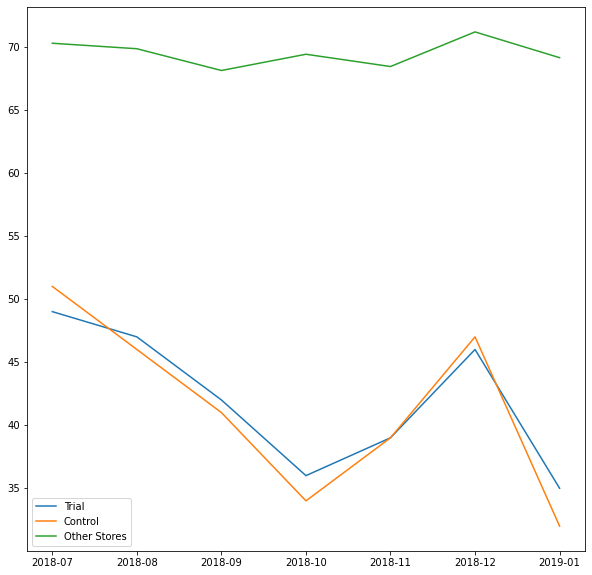

In [130]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
x=pretrial_sales_stores_final.index.astype('str')
y1=customers_num_stores_final['77']
y2=customers_num_stores_final['233']
y3=otherstores_num['avg_num_customers']
ax.plot(x,y1,label='Trial')
#ax2 = ax.twinx()
ax.plot(x,y2,label='Control')
ax.plot(x,y3,label='Other Stores')
ax.legend()

In [131]:
#preparing final dataset for hypothesis testing
data_hypo_customers=data_cleaned[['yearmonth','LYLTY_CARD_NBR','STORE_NBR']]
data_hypo_customers=data_hypo_customers.groupby(['STORE_NBR','yearmonth'])['LYLTY_CARD_NBR'].nunique().reset_index() 

In [132]:
data_hypo_customers=data_hypo_customers[data_hypo_customers['STORE_NBR'].isin(['77','233'])] #trial & control stores only
data_hypo_customers.head()

,STORE_NBR,yearmonth,LYLTY_CARD_NBR
1747,233,2018-07,51
1748,233,2018-08,46
1749,233,2018-09,41
1750,233,2018-10,34
1751,233,2018-11,39


In [133]:
data_hypo_customers=data_hypo_customers.pivot(index='yearmonth',columns='STORE_NBR',values='LYLTY_CARD_NBR')
data_hypo_customers.head()

STORE_NBR,233,77
yearmonth,,
2018-07,51,49
2018-08,46,47
2018-09,41,42
2018-10,34,36
2018-11,39,39


In [134]:
data_hypo_scaling=data_hypo_customers.reset_index()
scaling_factor_period2=data_hypo_scaling[data_hypo_scaling['yearmonth']<'2019-02']
scaling_factor2=sum(scaling_factor_period2['77'].values)/sum(scaling_factor_period2['233'].values)
scaling_factor2

1.013793103448276

In [135]:
data_hypo_customers['scaled_233']=data_hypo_customers['233']*scaling_factor2
data_hypo_customers['per_diff_scaled']=abs((data_hypo_customers['scaled_233']-data_hypo_customers['77'])/data_hypo_customers['scaled_233'])
data_hypo_customers

STORE_NBR,233,77,scaled_233,per_diff_scaled
yearmonth,,,,
2018-07,51,49,51.703448,0.052288
2018-08,46,47,46.634483,0.007838
2018-09,41,42,41.565517,0.010453
2018-10,34,36,34.468966,0.044418
2018-11,39,39,39.537931,0.013605
2018-12,47,46,47.648276,0.034593
2019-01,32,35,32.441379,0.078869
2019-02,43,44,43.593103,0.009334
2019-03,39,47,39.537931,0.188732


In [136]:
std2=st.stdev(data_hypo_customers[:7]['per_diff_scaled'])
std2

0.02616946382885311

In [137]:
data_hypo_customers['t_statistic']=data_hypo_customers['per_diff_scaled']/std2
data_hypo_customers

STORE_NBR,233,77,scaled_233,per_diff_scaled,t_statistic
yearmonth,,,,,
2018-07,51,49,51.703448,0.052288,1.998038
2018-08,46,47,46.634483,0.007838,0.299506
2018-09,41,42,41.565517,0.010453,0.399434
2018-10,34,36,34.468966,0.044418,1.697313
2018-11,39,39,39.537931,0.013605,0.519898
2018-12,47,46,47.648276,0.034593,1.321867
2019-01,32,35,32.441379,0.078869,3.013782
2019-02,43,44,43.593103,0.009334,0.356674
2019-03,39,47,39.537931,0.188732,7.211913


In [138]:
stdnofcustomers=st.stdev(data_hypo_customers['233']) #std_deviation
moe_customers=(1.94*stdnofcustomers)/np.sqrt(12) #margin of error

In [139]:
data_hypo_customers['5%']=data_hypo_customers['233']-moe_customers
data_hypo_customers['95%']=data_hypo_customers['233']+moe_customers
data_hypo_customers

STORE_NBR,233,77,scaled_233,per_diff_scaled,t_statistic,5%,95%
yearmonth,,,,,,,
2018-07,51,49,51.703448,0.052288,1.998038,46.71937,55.28063
2018-08,46,47,46.634483,0.007838,0.299506,41.71937,50.28063
2018-09,41,42,41.565517,0.010453,0.399434,36.71937,45.28063
2018-10,34,36,34.468966,0.044418,1.697313,29.71937,38.28063
2018-11,39,39,39.537931,0.013605,0.519898,34.71937,43.28063
2018-12,47,46,47.648276,0.034593,1.321867,42.71937,51.28063
2019-01,32,35,32.441379,0.078869,3.013782,27.71937,36.28063
2019-02,43,44,43.593103,0.009334,0.356674,38.71937,47.28063
2019-03,39,47,39.537931,0.188732,7.211913,34.71937,43.28063


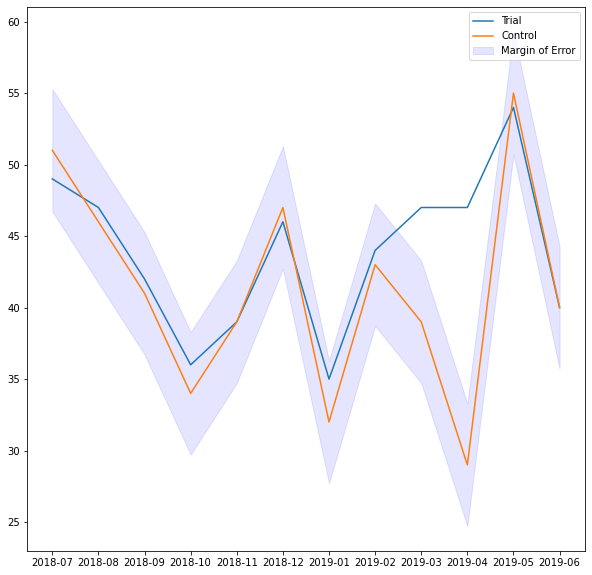

In [140]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
x=data_hypo_customers.index.astype('str')
y1=data_hypo_customers['77']
y2=data_hypo_customers['233']
ax.plot(x,y1,label='Trial')
ax.plot(x,y2,label='Control')
ax.fill_between(x, (y2-moe_customers), (y2+moe_customers), color='b', alpha=.1,label='Margin of Error')
ax.legend()